# Bucher data exploration

General notes:

* translate dates into weekdays and month
* 
# places: bus stops or parks, polygons
# map features: streets



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'/Users/mfilipav/Desktop/bucher/SmartCleanCityHackZurich19'

In [3]:
pred_msr = pd.read_csv("./data/2019-09-27-basel-measures-prediction.csv", sep=";") 


In [125]:
msr = pd.read_csv("./data/2019-09-27-basel-measures-cleaned.csv", sep=";") #, keep_default_na = False) 


In [5]:
clt = pd.read_csv("./data/2019-09-27-basel-collections.csv", sep=",") 


In [157]:
msr.head()

,collection,suitcase_id,place_name,place_type,osm_id,cci_id,date,cci,rateCigarrettes,ratePapers,rateBottles,rateExcrements,rateSyringues,rateGums,rateLeaves,rateGrits,rateGlassDebris
0,places,49,Leimgrubenweg,bus_stop,1175332462,287,2019-04-01 8:40:49,3.20000,0.60000,1.2,0.0,0,0,0,0.00000,0,0.0
1,map_features,49,Leimgrubenweg,secondary,25149740,86_9668,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
2,map_features,49,Reinacherstrasse,primary,117485263,86_11641,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
3,places,49,Leimgrubenweg,bus_stop,2621172927,287,2019-04-01 8:40:57,3.19757,0.60000,1.2,0.0,0,0,0,0.00243,0,0.0
4,map_features,49,Dornacherstrasse,secondary,148833576,86_12436,2019-04-01 8:42:11,5.00000,0.00000,0.0,0.0,0,0,0,0.00000,0,0.0


In [158]:
msr.tail()

,collection,suitcase_id,place_name,place_type,osm_id,cci_id,date,cci,rateCigarrettes,ratePapers,rateBottles,rateExcrements,rateSyringues,rateGums,rateLeaves,rateGrits,rateGlassDebris
58237,map_features,59,Feldbergstrasse,tertiary,182423029,86_12971,2019-09-20 16:40:16,3.692390,0.378171,0.929439,0.0,0,0,0,0.000000,0,0.0
58238,map_features,59,Feldbergstrasse,tertiary,182423029,86_12972,2019-09-20 16:40:16,3.782134,0.411573,0.806293,0.0,0,0,0,0.000000,0,0.0
58239,map_features,59,Klybeckstrasse,tertiary,182422859,86_12969,2019-09-20 16:40:20,3.867693,0.516248,0.615552,0.0,0,0,0,0.000508,0,0.0
58240,map_features,59,Amerbachstrasse,residential,97984332,86_1779,2019-09-20 16:41:08,4.399277,0.600000,0.000000,0.0,0,0,0,0.000723,0,0.0
58241,map_features,59,Offenburgerstrasse,residential,9398555,86_8723,2019-09-20 16:41:08,4.399277,0.600000,0.000000,0.0,0,0,0,0.000723,0,0.0


In [12]:
pred_msr.head()

,osm_id,cci_id,date,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240
0,172611027,86_12812,2019-06-25 6:25:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3828924874,260,2019-06-25 6:26:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23913163,86_9255,2019-06-25 6:26:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23913163,86_17476,2019-06-25 6:26:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,144481239,86_12223,2019-06-25 6:27:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
clt.head(10)

,city_id,osm_id,cci_id,type,geometry,coordinates
0,86,263256727.0,324,Place,Polygon,"POLYGON((7.601737973795679 47.532477, 7.601737..."
1,86,270322890.0,NaN,Place,Polygon,"POLYGON((7.568622384667696 47.561588, 7.568621..."
2,86,274674809.0,NaN,Place,Polygon,"POLYGON((7.589516633078348 47.5480482, 7.58951..."
3,86,583586314.0,251,Place,Polygon,"POLYGON((7.583728694181322 47.5640838, 7.58372..."
4,86,707688638.0,266,Place,Polygon,"POLYGON((7.569987711883181 47.5687268, 7.56998..."
5,86,707688677.0,266,Place,Polygon,"POLYGON((7.573156901658795 47.5660452, 7.57315..."
6,86,707688723.0,266,Place,Polygon,"POLYGON((7.573843098654215 47.5652571, 7.57384..."
7,86,707688727.0,266,Place,Polygon,"POLYGON((7.573092700297358 47.5656881, 7.57309..."
8,86,759733150.0,287,Place,Polygon,"POLYGON((7.564977301710264 47.5660587, 7.56497..."
9,86,759733151.0,287,Place,Polygon,"POLYGON((7.565369203143785 47.5664347, 7.56536..."


# Measures
## Unique Streets

In [64]:
list(msr.columns)

['collection',
 'suitcase_id',
 'place_name',
 'place_type',
 'osm_id',
 'cci_id',
 'date',
 'cci',
 'rateCigarrettes',
 'ratePapers',
 'rateBottles',
 'rateExcrements',
 'rateSyringues',
 'rateGums',
 'rateLeaves',
 'rateGrits',
 'rateGlassDebris',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 'Unnamed: 60',
 'Unnamed: 61',
 'Unnamed: 62',
 'Unnamed: 63'

In [18]:
msr.osm_id.unique()

array([1175332462, 25149740, 117485263, ..., '97984332', '9398555',
       'osm_id'], dtype=object)

In [18]:
len(msr.osm_id.unique())

1436





# Date Range?



In [147]:

msr.date.

<bound method Series.max of 0         2019-04-01 8:40:49
1         2019-04-01 8:40:53
2         2019-04-01 8:40:53
3         2019-04-01 8:40:57
4         2019-04-01 8:42:11
5         2019-04-01 8:42:11
6         2019-04-01 8:42:27
7         2019-04-01 8:45:50
8         2019-04-01 8:47:29
9         2019-04-01 8:48:26
10        2019-04-01 8:48:46
11        2019-04-01 8:48:46
12        2019-04-01 8:49:14
13        2019-04-01 8:49:18
14        2019-04-01 8:49:52
15        2019-04-01 8:49:58
16        2019-04-01 8:50:38
17        2019-04-01 8:50:38
18        2019-04-01 8:50:53
19        2019-04-01 8:50:53
20        2019-04-01 8:51:15
21        2019-04-01 8:51:29
22        2019-04-01 8:51:29
23        2019-04-01 8:52:10
24        2019-04-01 8:52:10
25        2019-04-01 8:52:17
26        2019-04-01 8:52:53
27        2019-04-01 8:52:53
28        2019-04-01 8:52:53
29        2019-04-01 8:52:53
                ...         
58212    2019-09-20 16:34:38
58213    2019-09-20 16:34:38
58214    2019-0

In [131]:
msr.head()

,collection,suitcase_id,place_name,place_type,osm_id,cci_id,date,cci,rateCigarrettes,ratePapers,rateBottles,rateExcrements,rateSyringues,rateGums,rateLeaves,rateGrits,rateGlassDebris
0,places,49,Leimgrubenweg,bus_stop,1175332462,287,2019-04-01 8:40:49,3.20000,0.60000,1.2,0.0,0,0,0,0.00000,0,0.0
1,map_features,49,Leimgrubenweg,secondary,25149740,86_9668,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
2,map_features,49,Reinacherstrasse,primary,117485263,86_11641,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
3,places,49,Leimgrubenweg,bus_stop,2621172927,287,2019-04-01 8:40:57,3.19757,0.60000,1.2,0.0,0,0,0,0.00243,0,0.0
4,map_features,49,Dornacherstrasse,secondary,148833576,86_12436,2019-04-01 8:42:11,5.00000,0.00000,0.0,0.0,0,0,0,0.00000,0,0.0


In [ ]:
msr.cci_id.groupby(msr.osm_id).count().head(20)

In [137]:
msr[['collection', 'place_type']].groupby(['place_type'])


In [138]:
df

In [140]:
msr.place_type.groupby(msr.collection).count()

collection
map_features    51093
places           7149
Name: place_type, dtype: int64

## Number intersections per street

In [25]:
#len(msr.cci_id.groupby(msr.osm_id).count())
msr.cci_id.groupby(msr.osm_id).count().head(20)

osm_id
4803830     191
4803831     131
4803852     125
4803859      56
4837930      58
4838574     109
4840867      66
4840869     121
9398550     140
9398555     183
9554150     122
9554151      52
9554159     139
9554160     121
9673526     100
9673528      84
9673533      48
9673534      96
10158873    151
10158874    140
Name: cci_id, dtype: int64

In [33]:
msr.cci_id.groupby(msr.osm_id).count().sort_values(ascending=False).head(20)

osm_id
151410240    295
24781497     264
23884886     241
13252023     232
19781280     229
10158891     224
605805584    220
23884883     219
23348441     215
182423029    211
335418859    201
24839329     200
332740546    198
333652248    194
19751448     191
4803830      191
19750775     190
183482915    186
9398555      183
109731333    183
Name: cci_id, dtype: int64

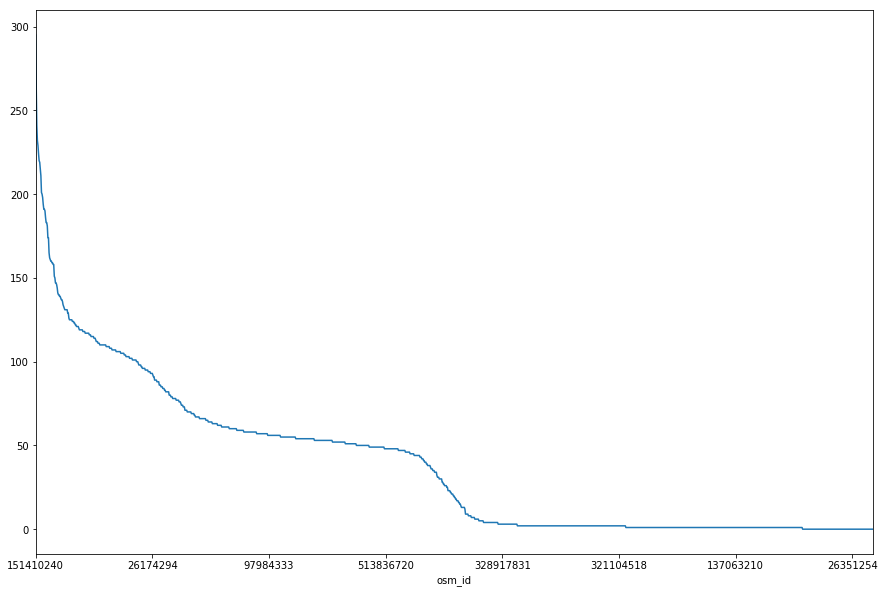

In [39]:
msr.cci_id.groupby(msr.osm_id).count().sort_values(ascending=False).plot(figsize=(15,10))

# Data by Place Type

In [72]:
msr.head()

,collection,suitcase_id,place_name,place_type,osm_id,cci_id,date,cci,rateCigarrettes,ratePapers,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,places,49,Leimgrubenweg,bus_stop,1175332462,287,2019-04-01 8:40:49,3.2,0.6,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,map_features,49,Leimgrubenweg,secondary,25149740,86_9668,2019-04-01 8:40:53,3.35764,0.44236,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,map_features,49,Reinacherstrasse,primary,117485263,86_11641,2019-04-01 8:40:53,3.35764,0.44236,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,places,49,Leimgrubenweg,bus_stop,2621172927,287,2019-04-01 8:40:57,3.19757,0.6,1.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,map_features,49,Dornacherstrasse,secondary,148833576,86_12436,2019-04-01 8:42:11,5,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
msr.place_type.value_counts()

residential       19858
secondary         10218
primary            6701
bus_stop           5915
tertiary           4446
footway            4302
unclassified       2313
pedestrian         1754
no type found      1234
cycleway            723
secondary_link      229
service             196
steps                86
primary_link         78
living_street        70
path                 69
motorway_link        50
place_type            1
Name: place_type, dtype: int64

In [86]:
msr.collection.value_counts()

map_features    51093
places           7149
collection          1
Name: collection, dtype: int64

# Group by place type and CCI

In [126]:
df = msr[["place_type", "cci"]]
df.head()

,place_type,cci
0,bus_stop,3.20000
1,secondary,3.35764
2,primary,3.35764
3,bus_stop,3.19757
4,secondary,5.00000


In [127]:
df.groupby(['place_type).mean()

DataError: No numeric types to aggregate

In [128]:
df.cci.dtype()

TypeError: 'numpy.dtype' object is not callable

In [ ]:
df.groupby(['cluster','org']).mean()

In [129]:
df.cci.dtype

dtype('float64')

In [121]:
msr.suitcase_id.value_counts()

49             41570
59             15774
59               898
suitcase_id        1
Name: suitcase_id, dtype: int64

In [153]:
cal = pd.read_csv("./data/event_cal.csv", sep=";")


In [154]:
cal

,day,Unnamed: 1
0,01.01.2019,NaN
1,11.03.2019,NaN
2,12.03.2019,NaN
3,13.03.2019,NaN
4,19.04.2019,NaN
5,21.04.2019,NaN
6,22.04.2019,NaN
7,01.05.2019,NaN
8,30.05.2019,NaN
9,09.06.2019,NaN


In [155]:
import datetime